In [35]:
#Reaction-Diffusion assignment for MAE6286. Code written by Shantanu Bailoor

#Import parameters as described in problem statement
import numpy as np
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

#Import more, if needed


In [55]:
#Define parameters as described in problem statement
n = 192
Du = 0.00016 
Dv = 0.00008 
F = 0.035
k = 0.065 # Bacteria 1

dh = 5/(n-1)
T = 8000
dt = .9 * dh**2 / (4*max(Du,Dv))
nt = int(T/dt)


In [56]:
#Import initial conditions as described
uvinitial = np.load('./data/uvinitial.npz')
U0 = uvinitial['U']
V0 = uvinitial['V']

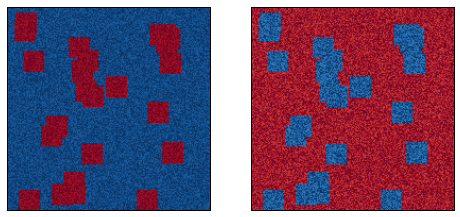

In [57]:
#Plot initial conditions:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U0, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V0, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [58]:
#Define other variables:
uold = np.copy(U0); vold = np.copy(V0); 
unew = np.copy(U0); vnew = np.copy(V0);
time = 0.0;

for iter in range (nt):
    
    #---------------------------------------------------------------------#
    #Solve X-Equation:
    #Since grid is uniform, it may be done outside spatial loops
    De = Du/dh/dh; Dw = Du/dh/dh; Dn = Du/dh/dh; Ds = Du/dh/dh; 
    Dp = -1.0*(De + Dw + Dn + Ds);
    
    #First loop over interior points
    for i in range (1, n-1):
        for j in range (1, n-1):
            Ue = uold[i+1][j]; Uw = uold[i-1][j];
            Un = uold[i][j+1]; Us = uold[i][j-1];
            Up = uold[i][j]; Vp = vold[i][j];
            Fdiff = De*Ue + Dw*Uw + Dn*Un + Ds*Us + Dp*Up;
            
            #Forward Euler step:
            unew[i][j] = Up + dt*(Fdiff - Up*Vp*Vp + F*(1.0-Up));
            
    #Impose boundary conditions:
    #Left face:
    unew[0][:] = unew[1][:];
    #Right face:
    unew[n-1][:] = unew[n-2][:];
    #Bottom face:
    unew[:][0] = unew[:][1];
    #Top face:
    unew[:][n-1] = unew[:][n-2];
    
    #---------------------------------------------------------------------#
    
    #Solve Y-Equation:
    #Since grid is uniform, it may be done outside spatial loops
    De = Dv/dh/dh; Dw = Dv/dh/dh; Dn = Dv/dh/dh; Ds = Dv/dh/dh; 
    Dp = -1.0*(De + Dw + Dn + Ds);
    
    #First loop over interior points
    for i in range (1, n-1):
        for j in range (1, n-1):
            Ve = vold[i+1][j]; Vw = vold[i-1][j];
            Vn = vold[i][j+1]; Vs = vold[i][j-1];
            Up = uold[i][j]; Vp = vold[i][j];
            Fdiff = De*Ve + Dw*Vw + Dn*Vn + Ds*Vs + Dp*Vp;
            
            #Forward Euler step:
            vnew[i][j] = Vp + dt*(Fdiff + Up*Vp*Vp - (F+k)*Vp);
            
    #Impose boundary conditions:
    #Left face:
    vnew[0][:] = vnew[1][:];
    #Right face:
    vnew[n-1][:] = vnew[n-2][:];
    #Bottom face:
    vnew[:][0] = vnew[:][1];
    #Top face:
    vnew[:][n-1] = vnew[:][n-2];
    
    #---------------------------------------------------------------------#
    
    #Update old fields:
    uold = np.copy(unew); vold = np.copy(vnew);
    time = time + dt;

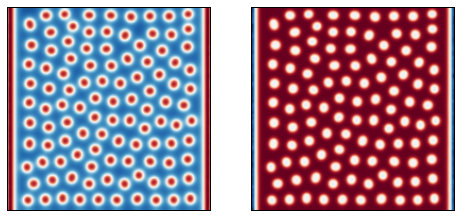

In [59]:
#Plot initial conditions:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(unew, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(vnew, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [60]:
unew[100,::40]

array([ 1.0425956 ,  0.73301724,  0.65810617,  0.90385871,  0.9278711 ])